In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import pandas as pd

In [2]:
#Reading the Training data (virtually generated) from a file 
#Input data
x_data = pd.read_csv('x_rec_16_data_5.csv')
x_data=x_data.values[:,1:]
print("read_x_data")
#Output data
y_data = pd.read_csv('y_rec_16_data_5.csv')
y_data=y_data.values[:,1:]
print("read_y_data")
print(x_data[:2,:])
print(y_data[:2,:])

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_data, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
from keras.models import load_model


input_layer = Input(shape=(48,))
hidden_layer_1 = Dense(units = 700, activation = 'relu')(input_layer)
hidden_layer_2 = Dense(units = 700, activation = 'relu')(hidden_layer_1)
output_layer = Dense(units = 7, activation = 'linear')(hidden_layer_2)
model = Model(inputs = input_layer, outputs = output_layer, name = 'sensor_concept_nn')
#opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mae', optimizer='adam')
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


# define the keras model

# Display the model
model.summary()

history_1 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])


read_x_data
read_y_data
[[-0.97820564  0.29297193 -0.07061703 -0.96544182  0.2754832  -0.07559271
  -0.95055615  0.26713403 -0.06478687 -0.94939434  0.28851273 -0.05467842
  -1.02291172  0.31880814 -0.06668594 -1.02036267  0.29820167 -0.09116619
  -0.98972578  0.26476729 -0.09036746 -0.9837491   0.30531915 -0.07307987
  -1.06898421  0.34968716 -0.03087716 -1.12097493  0.35989869 -0.06120685
  -1.15727766  0.31518646 -0.15790448 -1.05000599  0.3741363  -0.18206539
  -0.59768246  0.20031284 -0.03087716 -0.54569173  0.19010131 -0.06120685
  -0.50938901  0.23481354 -0.15790448 -0.61666068  0.1758637  -0.18206539]
 [-0.96984174  0.28045413 -0.07554428 -0.95366561  0.26681943 -0.06915842
  -0.94867445  0.2803592  -0.05532045 -0.94855848  0.30831947 -0.06174094
  -1.02365787  0.3062235  -0.08467621 -0.9992982   0.27119693 -0.09646884
  -0.9827315   0.28755233 -0.07063151 -0.96914893  0.3312652  -0.09716293
  -1.10428192  0.35754912 -0.04928571 -1.163557    0.34725352 -0.12266363
  -1.09223439

In [3]:
#max in all columns of strain data 1%error
max_val=np.max(x_data)
min_val=np.min(x_data)
range_val = max_val-min_val
shape_x_data=np.shape(x_data)
err=0.01
x_data_noise=x_data+np.random.uniform(0,err*range_val,(shape_x_data[0],shape_x_data[1]))
#x_data_noise-x_data

X_train, X_val, y_train, y_val = train_test_split(x_data_noise, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

history_2 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])


(11718, 48) (11718, 7) training data size
(3907, 48) (3907, 7) Validation data size
Epoch 1/30
367/367 - 2s - loss: 0.0708 - val_loss: 0.0891
Epoch 2/30
367/367 - 2s - loss: 0.0697 - val_loss: 0.0908
Epoch 3/30
367/367 - 2s - loss: 0.0692 - val_loss: 0.0924
Epoch 4/30
367/367 - 2s - loss: 0.0688 - val_loss: 0.0883
Epoch 5/30
367/367 - 2s - loss: 0.0684 - val_loss: 0.0852
Epoch 6/30
367/367 - 2s - loss: 0.0679 - val_loss: 0.0883
Epoch 7/30
367/367 - 2s - loss: 0.0675 - val_loss: 0.0921
Epoch 8/30
367/367 - 2s - loss: 0.0671 - val_loss: 0.0881
Epoch 9/30
367/367 - 2s - loss: 0.0667 - val_loss: 0.0865
Epoch 10/30
367/367 - 2s - loss: 0.0663 - val_loss: 0.0880
Epoch 11/30
367/367 - 2s - loss: 0.0661 - val_loss: 0.0867
Epoch 12/30
367/367 - 2s - loss: 0.0658 - val_loss: 0.0855
Epoch 13/30
367/367 - 2s - loss: 0.0655 - val_loss: 0.0879
Epoch 14/30
367/367 - 2s - loss: 0.0654 - val_loss: 0.0907
Epoch 15/30
367/367 - 2s - loss: 0.0652 - val_loss: 0.0887
Epoch 16/30
367/367 - 2s - loss: 0.0650 

In [4]:
#Increasing the noise
err=0.1
x_data_noise_10=x_data+np.random.uniform(0,err*range_val,(shape_x_data[0],shape_x_data[1]))
X_train, X_val, y_train, y_val = train_test_split(x_data_noise_10, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

history_3 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])


(11718, 48) (11718, 7) training data size
(3907, 48) (3907, 7) Validation data size
Epoch 1/30
367/367 - 2s - loss: 0.2183 - val_loss: 0.2112
Epoch 2/30
367/367 - 2s - loss: 0.1994 - val_loss: 0.2008
Epoch 3/30
367/367 - 2s - loss: 0.1927 - val_loss: 0.1952
Epoch 4/30
367/367 - 2s - loss: 0.1885 - val_loss: 0.1915
Epoch 5/30
367/367 - 2s - loss: 0.1855 - val_loss: 0.1896
Epoch 6/30
367/367 - 2s - loss: 0.1833 - val_loss: 0.1878
Epoch 7/30
367/367 - 2s - loss: 0.1818 - val_loss: 0.1858
Epoch 8/30
367/367 - 2s - loss: 0.1806 - val_loss: 0.1854
Epoch 9/30
367/367 - 2s - loss: 0.1796 - val_loss: 0.1840
Epoch 10/30
367/367 - 2s - loss: 0.1788 - val_loss: 0.1836
Epoch 11/30
367/367 - 2s - loss: 0.1782 - val_loss: 0.1826
Epoch 12/30
367/367 - 2s - loss: 0.1777 - val_loss: 0.1824
Epoch 13/30
367/367 - 2s - loss: 0.1772 - val_loss: 0.1822
Epoch 14/30
367/367 - 2s - loss: 0.1768 - val_loss: 0.1816
Epoch 15/30
367/367 - 2s - loss: 0.1765 - val_loss: 0.1813
Epoch 16/30
367/367 - 2s - loss: 0.1762 

In [5]:
#Increasing the noise to 
err=0.3
x_data_noise_30=x_data+np.random.uniform(0,err*range_val,(shape_x_data[0],shape_x_data[1]))
X_train, X_val, y_train, y_val = train_test_split(x_data_noise_30, y_data)
print(np.shape(X_train), np.shape(y_train), "training data size")
print(np.shape(X_val), np.shape(y_val),"Validation data size")
#print(X_train[0:9,:])

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_val)
xval_scale=scaler_x.transform(X_val)

scaler_y.fit(y_train)
ytrain_scale=scaler_y.transform(y_train)

scaler_y.fit(y_val)
yval_scale=scaler_y.transform(y_val)

history_4 = model.fit(xtrain_scale, ytrain_scale, epochs=30, verbose=2, validation_data=(xval_scale,yval_scale), callbacks=[callback])


(11718, 48) (11718, 7) training data size
(3907, 48) (3907, 7) Validation data size
Epoch 1/30
367/367 - 2s - loss: 0.2779 - val_loss: 0.2749
Epoch 2/30
367/367 - 2s - loss: 0.2679 - val_loss: 0.2688
Epoch 3/30
367/367 - 2s - loss: 0.2625 - val_loss: 0.2650
Epoch 4/30
367/367 - 2s - loss: 0.2589 - val_loss: 0.2623
Epoch 5/30
367/367 - 2s - loss: 0.2564 - val_loss: 0.2603
Epoch 6/30
367/367 - 2s - loss: 0.2545 - val_loss: 0.2589
Epoch 7/30
367/367 - 2s - loss: 0.2531 - val_loss: 0.2578
Epoch 8/30
367/367 - 2s - loss: 0.2520 - val_loss: 0.2569
Epoch 9/30
367/367 - 2s - loss: 0.2512 - val_loss: 0.2562
Epoch 10/30
367/367 - 2s - loss: 0.2505 - val_loss: 0.2556
Epoch 11/30
367/367 - 2s - loss: 0.2499 - val_loss: 0.2551
Epoch 12/30
367/367 - 2s - loss: 0.2494 - val_loss: 0.2547
Epoch 13/30
367/367 - 2s - loss: 0.2490 - val_loss: 0.2543
Epoch 14/30
367/367 - 2s - loss: 0.2486 - val_loss: 0.2540
Epoch 15/30
367/367 - 2s - loss: 0.2483 - val_loss: 0.2537
Epoch 16/30
367/367 - 2s - loss: 0.2480 

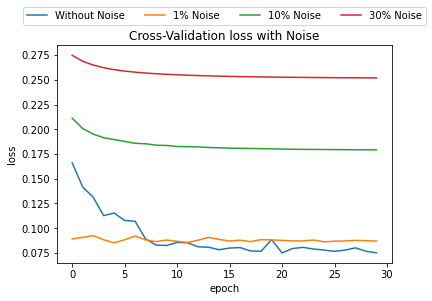

In [56]:
plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['val_loss'])
plt.plot(history_3.history['val_loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Cross-Validation loss with Noise')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(labels=('Without Noise', '1% Noise', '10% Noise', '30% Noise'), bbox_to_anchor=(0.5, 1.2), ncol = 4,loc='upper center')
#plt.xlim(0,50)
#plt.ylim(0.07,0.17)
#plt.xticks(np.arange(0.0, 31, 2))
#plt.yticks(np.arange(0.07, 0.18, 0.02))
plt.savefig('Validation_Loss_with_Noise_5p.png', dpi=1200)
plt.show()



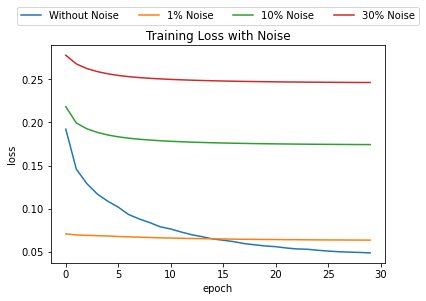

In [58]:
plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.plot(history_4.history['loss'])
plt.title('Training Loss with Noise')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Without Noise', '1% Noise', '10% Noise', '30% Noise'], loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
#plt.xlim(0.0,)
#plt.ylim(0.040,)
#plt.xticks(np.arange(0.0, 31, 2))
#plt.yticks(np.arange(0.0, 0.23, 0.02))
plt.savefig('Training_Loss_with_Noise_5p.png', dpi=1200)
plt.show()



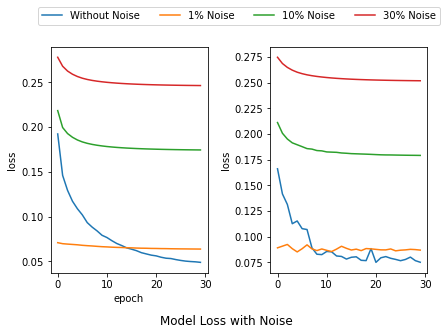

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(history_1.history['loss'])
ax1.plot(history_2.history['loss'])
ax1.plot(history_3.history['loss'])
ax1.plot(history_4.history['loss'])
ax2.plot(history_1.history['val_loss'])
ax2.plot(history_2.history['val_loss'])
ax2.plot(history_3.history['val_loss'])
ax2.plot(history_4.history['val_loss'])
fig.suptitle('Model Loss with Noise',y=-0.05)
fig.tight_layout()
plt.legend(labels=('Without Noise', '1% Noise', '10% Noise', '30% Noise'), bbox_to_anchor=(-0.2, 1.2), ncol = 4,loc='upper center')
#fig.set(ylabel='loss')
ax1.set(xlabel='epoch')
ax1.set(ylabel='loss')
ax2.set(ylabel='loss')
plt.subplots_adjust(wspace = 0.4)
#plt.legend(['Without Noise', '1% Noise', '10% Noise', '30% Noise'], loc= bbox_to_anchor=(0.5, 1.01),ncol=3, fancybox=True, shadow=True)
#plt.xlim(0,50)
#plt.ylim(0.07,0.17)
#plt.xticks(np.arange(0.0, 31, 2))
#plt.yticks(np.arange(0.07, 0.18, 0.02))
plt.savefig('Model_Loss_with_Noise_5p.png', dpi=1200,bbox_inches="tight")
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)